In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
data = pd.read_csv('/content/all_seasons.csv')
print(data.head())

   Unnamed: 0        player_name team_abbreviation   age  player_height  \
0           0      Dennis Rodman               CHI  36.0         198.12   
1           1  Dwayne Schintzius               LAC  28.0         215.90   
2           2       Earl Cureton               TOR  39.0         205.74   
3           3        Ed O'Bannon               DAL  24.0         203.20   
4           4        Ed Pinckney               MIA  34.0         205.74   

   player_weight                      college country draft_year draft_round  \
0      99.790240  Southeastern Oklahoma State     USA       1986           2   
1     117.933920                      Florida     USA       1990           1   
2      95.254320                Detroit Mercy     USA       1979           3   
3     100.697424                         UCLA     USA       1995           1   
4     108.862080                    Villanova     USA       1985           1   

   ...  pts   reb  ast  net_rating  oreb_pct  dreb_pct  usg_pct  ts_

In [ ]:
# Checking what columns we have
print("Column names:", data.columns.tolist())
print("\nData types:")
print(data.dtypes)

# Checking for missing values in our target columns
print("\nMissing values in height/weight:")
print(data[['player_height', 'player_weight']].isnull().sum())

# Basic statistics for our variables
print("\nBasic statistics for height and weight:")
print(data[['player_height', 'player_weight']].describe())

Column names: ['Unnamed: 0', 'player_name', 'team_abbreviation', 'age', 'player_height', 'player_weight', 'college', 'country', 'draft_year', 'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season']

Data types:
Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

Missing values in height/weight:
player_height    0
pl

In [ ]:
# Extract the height and weight columns
player_heights = data['player_height'].values  # in cm
player_weights = data['player_weight'].values  # in kg

print(f"Player heights range: {player_heights.min():.2f} to {player_heights.max():.2f} cm")
print(f"Player weights range: {player_weights.min():.2f} to {player_weights.max():.2f} kg")
print(f"Number of players: {len(player_heights)}")

# Let's also check the correlation mentioned in the dataset description
correlation = np.corrcoef(player_heights, player_weights)[0, 1]
print(f"Correlation between height and weight: {correlation:.4f}")

Player heights range: 160.02 to 231.14 cm
Player weights range: 60.33 to 163.29 kg
Number of players: 11145
Correlation between height and weight: 0.8299


In [ ]:
# Calculate basic parameters
mu_x = np.mean(player_heights)  # mean height
mu_y = np.mean(player_weights)  # mean weight
sigma_x = np.std(player_heights)  # std height
sigma_y = np.std(player_weights)  # std weight

# Calculate correlation manually (from scratch)
n = len(player_heights)
covariance = np.sum((player_heights - mu_x) * (player_weights - mu_y)) / n
rho = covariance / (sigma_x * sigma_y)

print("CALCULATED PARAMETERS FOR NBA DATA:")
print(f"μₓ (mean height): {mu_x:.4f} cm")
print(f"μᵧ (mean weight): {mu_y:.4f} kg")
print(f"σₓ (std height): {sigma_x:.4f} cm")
print(f"σᵧ (std weight): {sigma_y:.4f} kg")
print(f"ρ (correlation): {rho:.4f}")

print(f"\nExpected correlation from dataset: 0.8299")
print(f"Our calculated correlation: {rho:.4f}")
print(f"Difference: {abs(0.8299 - rho):.6f}")

CALCULATED PARAMETERS FOR NBA DATA:
μₓ (mean height): 200.8128 cm
μᵧ (mean weight): 100.6379 kg
σₓ (std height): 9.1906 cm
σᵧ (std weight): 12.5757 kg
ρ (correlation): 0.8299

Expected correlation from dataset: 0.8299
Our calculated correlation: 0.8299
Difference: 0.000001


In [ ]:
def bivariate_normal_pdf(x, y, mu_x, mu_y, sigma_x, sigma_y, rho):
# remember to make the values to be printed on this cell
    """
    Calculate bivariate normal PDF from scratch without statistical libraries
    """
    # 1. Normalization constant
    normalization = 1 / (2 * np.pi * sigma_x * sigma_y * np.sqrt(1 - rho**2))

    # 2. Q value (the exponent part)
    term1 = (x - mu_x)**2 / sigma_x**2
    term2 = (y - mu_y)**2 / sigma_y**2
    term3 = 2 * rho * (x - mu_x) * (y - mu_y) / (sigma_x * sigma_y)
    Q = term1 + term2 - term3

    # 3. Exponential part
    exponent = -Q / (2 * (1 - rho**2))

    # 4. Final PDF
    pdf_value = normalization * np.exp(exponent)

    return pdf_value

print("Bivariate normal PDF function implemented from scratch!")
print("Formula implemented: P(x,y) = [1/(2πσₓσᵧ√(1-ρ²))] × exp(-Q/[2(1-ρ²)])")
print("Where Q = [(x-μₓ)²/σₓ²] + [(y-μᵧ)²/σᵧ²] - [2ρ(x-μₓ)(y-μᵧ)/(σₓσᵧ)]")
print(f"\nUsing NBA parameters:")
print(f"μₓ = {mu_x:.2f} cm, μᵧ = {mu_y:.2f} kg")
print(f"σₓ = {sigma_x:.2f} cm, σᵧ = {sigma_y:.2f} kg")
print(f"ρ = {rho:.4f}")

Bivariate normal PDF function implemented from scratch!
Formula implemented: P(x,y) = [1/(2πσₓσᵧ√(1-ρ²))] × exp(-Q/[2(1-ρ²)])
Where Q = [(x-μₓ)²/σₓ²] + [(y-μᵧ)²/σᵧ²] - [2ρ(x-μₓ)(y-μᵧ)/(σₓσᵧ)]

Using NBA parameters:
μₓ = 200.81 cm, μᵧ = 100.64 kg
σₓ = 9.19 cm, σᵧ = 12.58 kg
ρ = 0.8299


In [ ]:
# Calculate PDF for each NBA player in the dataset
# more explanation on this particular loop of what exactly it;s doing
pdf_values = []
for i in range(len(player_heights)):
    pdf = bivariate_normal_pdf(player_heights[i], player_weights[i],
                              mu_x, mu_y, sigma_x, sigma_y, rho)
    pdf_values.append(pdf)

print(f"PDF calculated for all {len(pdf_values)} NBA players")
print(f"Average PDF: {np.mean(pdf_values):.8f}")
print(f"Highest PDF: {max(pdf_values):.8f}")
print(f"Lowest PDF: {min(pdf_values):.8f}")

# Find the most typical player (highest PDF)
max_pdf_idx = np.argmax(pdf_values)
print(f"\nMost typical NBA player (highest PDF):")
print(f"  Height: {player_heights[max_pdf_idx]:.2f} cm")
print(f"  Weight: {player_weights[max_pdf_idx]:.2f} kg")
print(f"  PDF Value: {pdf_values[max_pdf_idx]:.8f}")

# Find the most atypical player (lowest PDF)
min_pdf_idx = np.argmin(pdf_values)
print(f"\nMost atypical NBA player (lowest PDF):")
print(f"  Height: {player_heights[min_pdf_idx]:.2f} cm")
print(f"  Weight: {player_weights[min_pdf_idx]:.2f} kg")
print(f"  PDF Value: {pdf_values[min_pdf_idx]:.8f}")

# Let's also check the point at the center (the means)
center_pdf = bivariate_normal_pdf(mu_x, mu_y, mu_x, mu_y, sigma_x, sigma_y, rho)
print(f"\nPDF at distribution center (means): {center_pdf:.8f}")
print(f"  Center height: {mu_x:.2f} cm")
print(f"  Center weight: {mu_y:.2f} kg")
# what does it mean to have the lowest or highest pdf

PDF calculated for all 11145 NBA players
Average PDF: 0.00123231
Highest PDF: 0.00246664
Lowest PDF: 0.00000000

Most typical NBA player (highest PDF):
  Height: 200.66 cm
  Weight: 100.24 kg
  PDF Value: 0.00246664

Most atypical NBA player (lowest PDF):
  Height: 205.74 cm
  Weight: 147.42 kg
  PDF Value: 0.00000000

PDF at distribution center (means): 0.00246820
  Center height: 200.81 cm
  Center weight: 100.64 kg


In [ ]:
# Create a grid that covers the range of NBA player data
x_range = np.linspace(player_heights.min() - 5, player_heights.max() + 5, 100)
y_range = np.linspace(player_weights.min() - 5, player_weights.max() + 5, 100)
X, Y = np.meshgrid(x_range, y_range)

print(f"Visualization grid created: {X.shape}")
print(f"Height range: {x_range[0]:.2f} to {x_range[-1]:.2f} cm")
print(f"Weight range: {y_range[0]:.2f} to {y_range[-1]:.2f} kg")

Visualization grid created: (100, 100)
Height range: 155.02 to 236.14 cm
Weight range: 55.33 to 168.29 kg


In [ ]:
# Calculate PDF for each point in the grid (this might take a moment)
Z = np.zeros_like(X)

print("Calculating PDF on grid for NBA data...")
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = bivariate_normal_pdf(X[i, j], Y[i, j],
                                      mu_x, mu_y, sigma_x, sigma_y, rho)

print("PDF calculation on grid completed!")
print(f"Grid PDF values - Min: {Z.min():.8f}, Max: {Z.max():.8f}, Mean: {Z.mean():.8f}")
print(f"Theoretical maximum at center: {center_pdf:.8f}")

Calculating PDF on grid for NBA data...
PDF calculation on grid completed!
Grid PDF values - Min: 0.00000000, Max: 0.00246679, Mean: 0.00010693
Theoretical maximum at center: 0.00246820


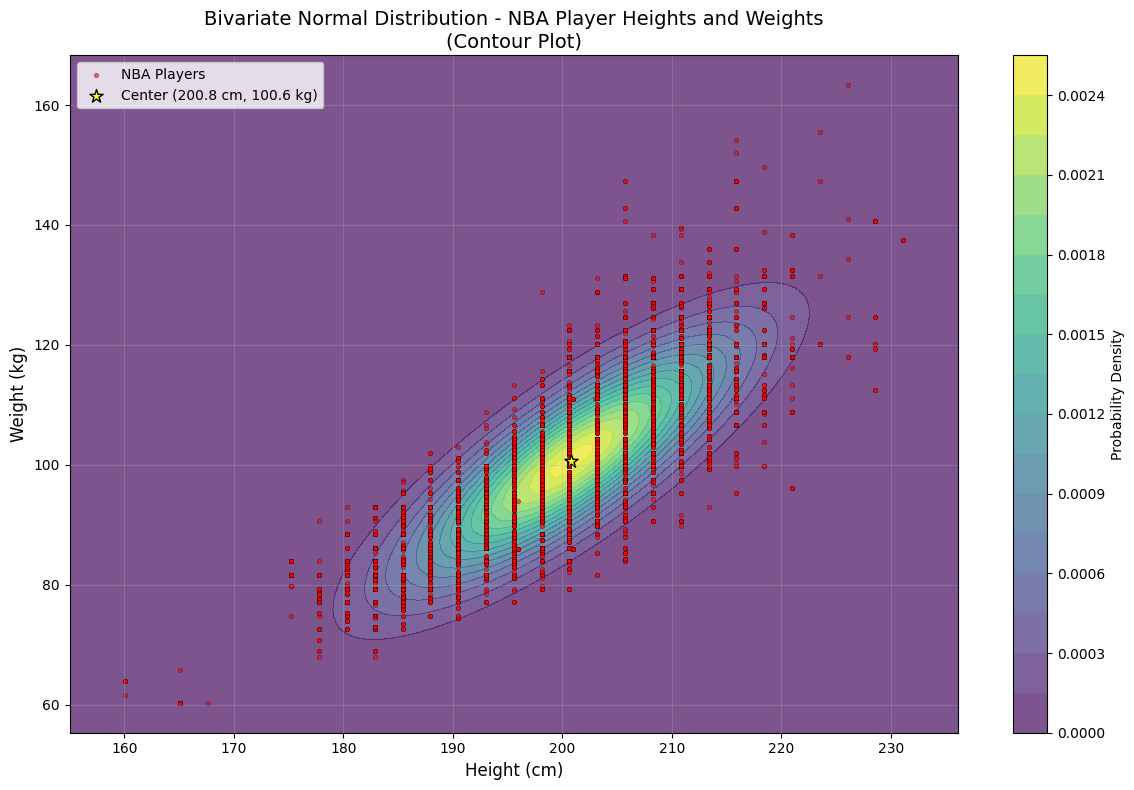

In [ ]:
plt.figure(figsize=(12, 8))

# Create contour plot
contour = plt.contourf(X, Y, Z, levels=20, cmap='viridis', alpha=0.7)
plt.colorbar(contour, label='Probability Density')

# Plot the actual NBA players
plt.scatter(player_heights, player_weights, color='red', s=10, alpha=0.6,
           label='NBA Players', edgecolors='black', linewidth=0.3)

# Mark the center of the distribution
plt.scatter(mu_x, mu_y, color='yellow', s=100, marker='*',
           label=f'Center ({mu_x:.1f} cm, {mu_y:.1f} kg)', edgecolors='black')

# Labels and formatting
plt.xlabel('Height (cm)', fontsize=12)
plt.ylabel('Weight (kg)', fontsize=12)
plt.title('Bivariate Normal Distribution - NBA Player Heights and Weights\n(Contour Plot)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

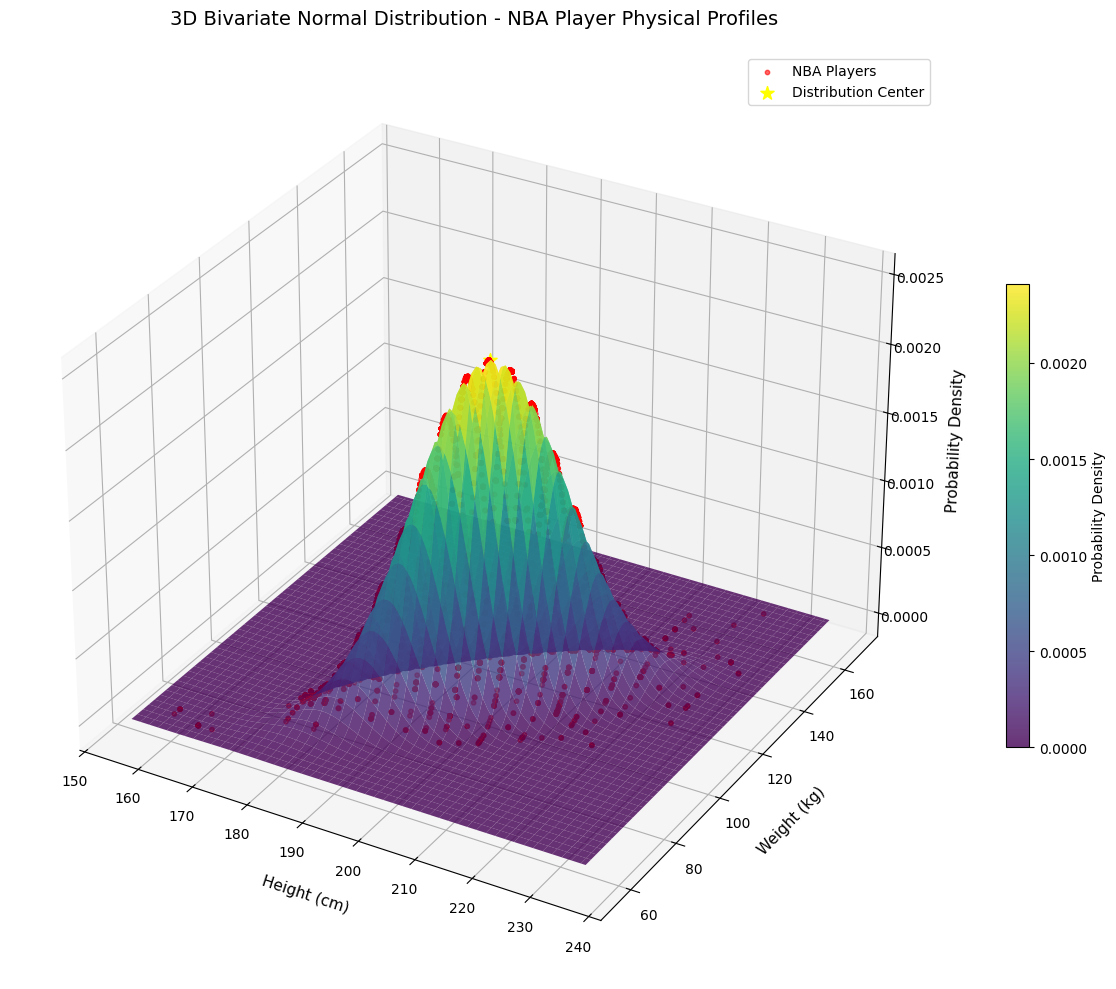

In [ ]:
# CELL 10: Create 3D Surface Plot for NBA Data
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

# Create surface plot
surf = ax.plot_surface(X, Y, Z, cmap='viridis',
                      alpha=0.8, linewidth=0,
                      antialiased=True, rstride=2, cstride=2)

# Plot the actual NBA players
ax.scatter(player_heights, player_weights, pdf_values,
          color='red', s=10, alpha=0.6, label='NBA Players')

# Mark the center
ax.scatter([mu_x], [mu_y], [center_pdf],
          color='yellow', s=100, marker='*', label='Distribution Center')

# Labels and formatting
ax.set_xlabel('Height (cm)', fontsize=11, labelpad=10)
ax.set_ylabel('Weight (kg)', fontsize=11, labelpad=10)
ax.set_zlabel('Probability Density', fontsize=11, labelpad=10)
ax.set_title('3D Bivariate Normal Distribution - NBA Player Physical Profiles', fontsize=14, pad=20)
ax.legend()

# Color bar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=20, label='Probability Density')

plt.tight_layout()
plt.show()